In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import requests
response = requests.get('http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names')
print(response.text)

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

In [3]:
# load the data set
df = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', sep='\s+')
# add column names
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', \
'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO',\
'B', 'LSTAT', 'MDEV']
#produce basic statistics to make sure things are lined up
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MDEV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PRATIO,B,LSTAT,MDEV
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#we are going to be splitting up the data set 'randomly',
#however we need to reproduce results so set the seed
random.seed(3277)
#split the data into training and testing (25% for testing)
training, testing = train_test_split(df, test_size = 0.25)
#need this step to create an instance of the lreg model
regr = linear_model.LinearRegression()
# Train the model using the training set (MDEV=target)
training_data = training.drop('MDEV', axis=1)
training_test = training.iloc[:,-1] #training.loc[:,['MDEV']]
#look at coefficients in the model to validate
regr.fit(training_data,training_test)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-1.11165853e-01  2.83126259e-02  1.24112265e-02  2.84391234e+00
 -2.23988258e+01  3.82627119e+00  3.92461041e-03 -1.49726623e+00
  3.17681642e-01 -1.25949418e-02 -1.11738741e+00  6.26507310e-03
 -4.87713543e-01]


Most of these are small numbers, except for a positive correlation with #6 at 3.8
for the number of rooms and a negative correlation with #8 at -1.5 for the
distance from the business center. It is interesting how people value being close
to work so highly:

In [6]:
#split up our test set
testing_data = testing.loc[:,['CRIM', 'ZN', 'INDUS', 'CHAS',\
'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PRATIO', 'B',\
'LSTAT']]
testing_test = testing[['MDEV']].as_matrix()
#make our prediction
prediction_of_test = regr.predict(testing_data)
# compute MSE
# would usually use the built-in mse function,
# but the test_test and prediction have diff # cols
sum = 0
rows = len(testing_test)
for i in range(rows):
    test = testing_test[i]
    prediction = prediction_of_test[i]
diff = (test - prediction) ** 2
sum = sum + diff
mse = sum / rows
print("MSE ", mse)

MSE  [0.11344143]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


There is an MSE of 23, which seems very low in comparison to the size of the
numbers being worked with. Now, let us graph our results to get a good visual of
what is going on:

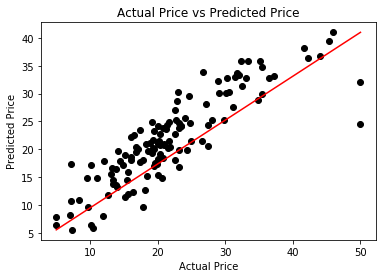

In [7]:
%matplotlib inline
#this preceding line is needed to display inline on Jupyter
#plot the tests and predictions
plt.scatter(testing_test, prediction_of_test, color='black')
#draw a line through the middle showing the fit
x0 = min(testing_test)
x1 = max(testing_test)
y0 = min(prediction_of_test)
y1 = max(prediction_of_test)
plt.plot([x0,x1],[y0,y1], color="red")
#add labels
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Visually, we appear to have a good fit. Most of the data points are aligned with
the axis drawn through. There are, as always, a few distinct outliers such as at
20, 50.